In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing dataset
df = pd.read_csv('/content/Telco_Customer_Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# **EDA and Data exploration**

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- 7,043 rows and 21 columns form a medium-sized churn classification dataset.
- Most features are categorical, making encoding critical.
- The  target `Churn` is object it has to converted into binary variable.
- `TotalCharges` has an incorrect data type and needs conversion.
- `SeniorCitizen` is categorical despite numeric encoding.

In [5]:
# Exploring target variable
print('Values in Churn columns', df['Churn'].unique())
print('Value counts:', df['Churn'].value_counts())

Values in Churn columns ['No' 'Yes']
Value counts: Churn
No     5174
Yes    1869
Name: count, dtype: int64


- The target variable `Churn` is binary with values `Yes` and `No`.
- Non-churned customers dominate the dataset (5,174 vs 1,869), indicating class imbalance.
- Roughly 26% of customers have churned, making accuracy an unreliable evaluation metric.
- Recall and F1-score for the churn class will be more informative than overall accuracy.

In [6]:
for col in df.columns:
  print(f'{col}:{df[col].unique()}')

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [7]:
# Fixing data correctness

# Droping 'customerID' as it adds zero predictive value to the model
df.drop(columns=['customerID'], inplace=True)
print('Verifying column drop:',('customerID' in df.columns))

# Coverting 'TotalCharges' to number as it should be
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print('`TotalCharges` to number:', df['TotalCharges'].dtypes)

# Customers with zero tenure has to have no billing history, so TotalCharges is set to 0
df.loc[df['tenure']==0, 'TotalCharges'] = 0
print('Cheking TotalCharges is set to 0:', (df.loc[df['tenure'] == 0, 'TotalCharges'] == 0).all())

# Converting Churn to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print('Churn to binary:', df['Churn'].unique(), 'Type:', df['Churn'].dtypes)

Verifying column drop: False
`TotalCharges` to number: float64
Cheking TotalCharges is set to 0: True
Churn to binary: [0 1] Type: int64


- Non-informative identifier `customerID` was removed to prevent noise and leakage.
- `TotalCharges` was converted to a numeric feature and corrected for zero-tenure customers using business logic.
- The target variable `Churn` was mapped to a binary format suitable for classification models.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


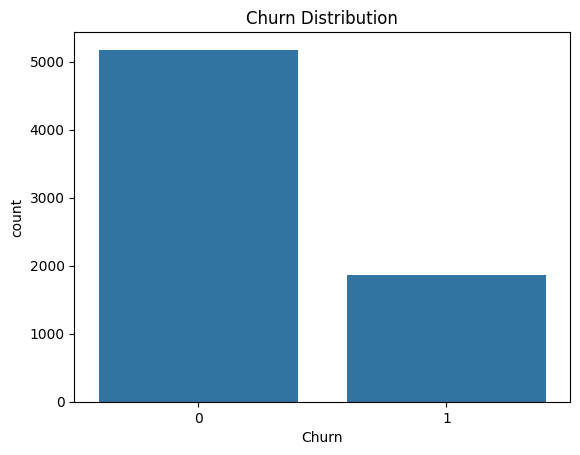

In [10]:
# Target distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

- The target variable is moderately imbalanced, with non-churn customers significantly outnumbering churners, making accuracy an unreliable evaluation metric.
- Approximately one-quarter of customers churn, indicating the need to prioritize recall and F1-score for the churn class during modeling.

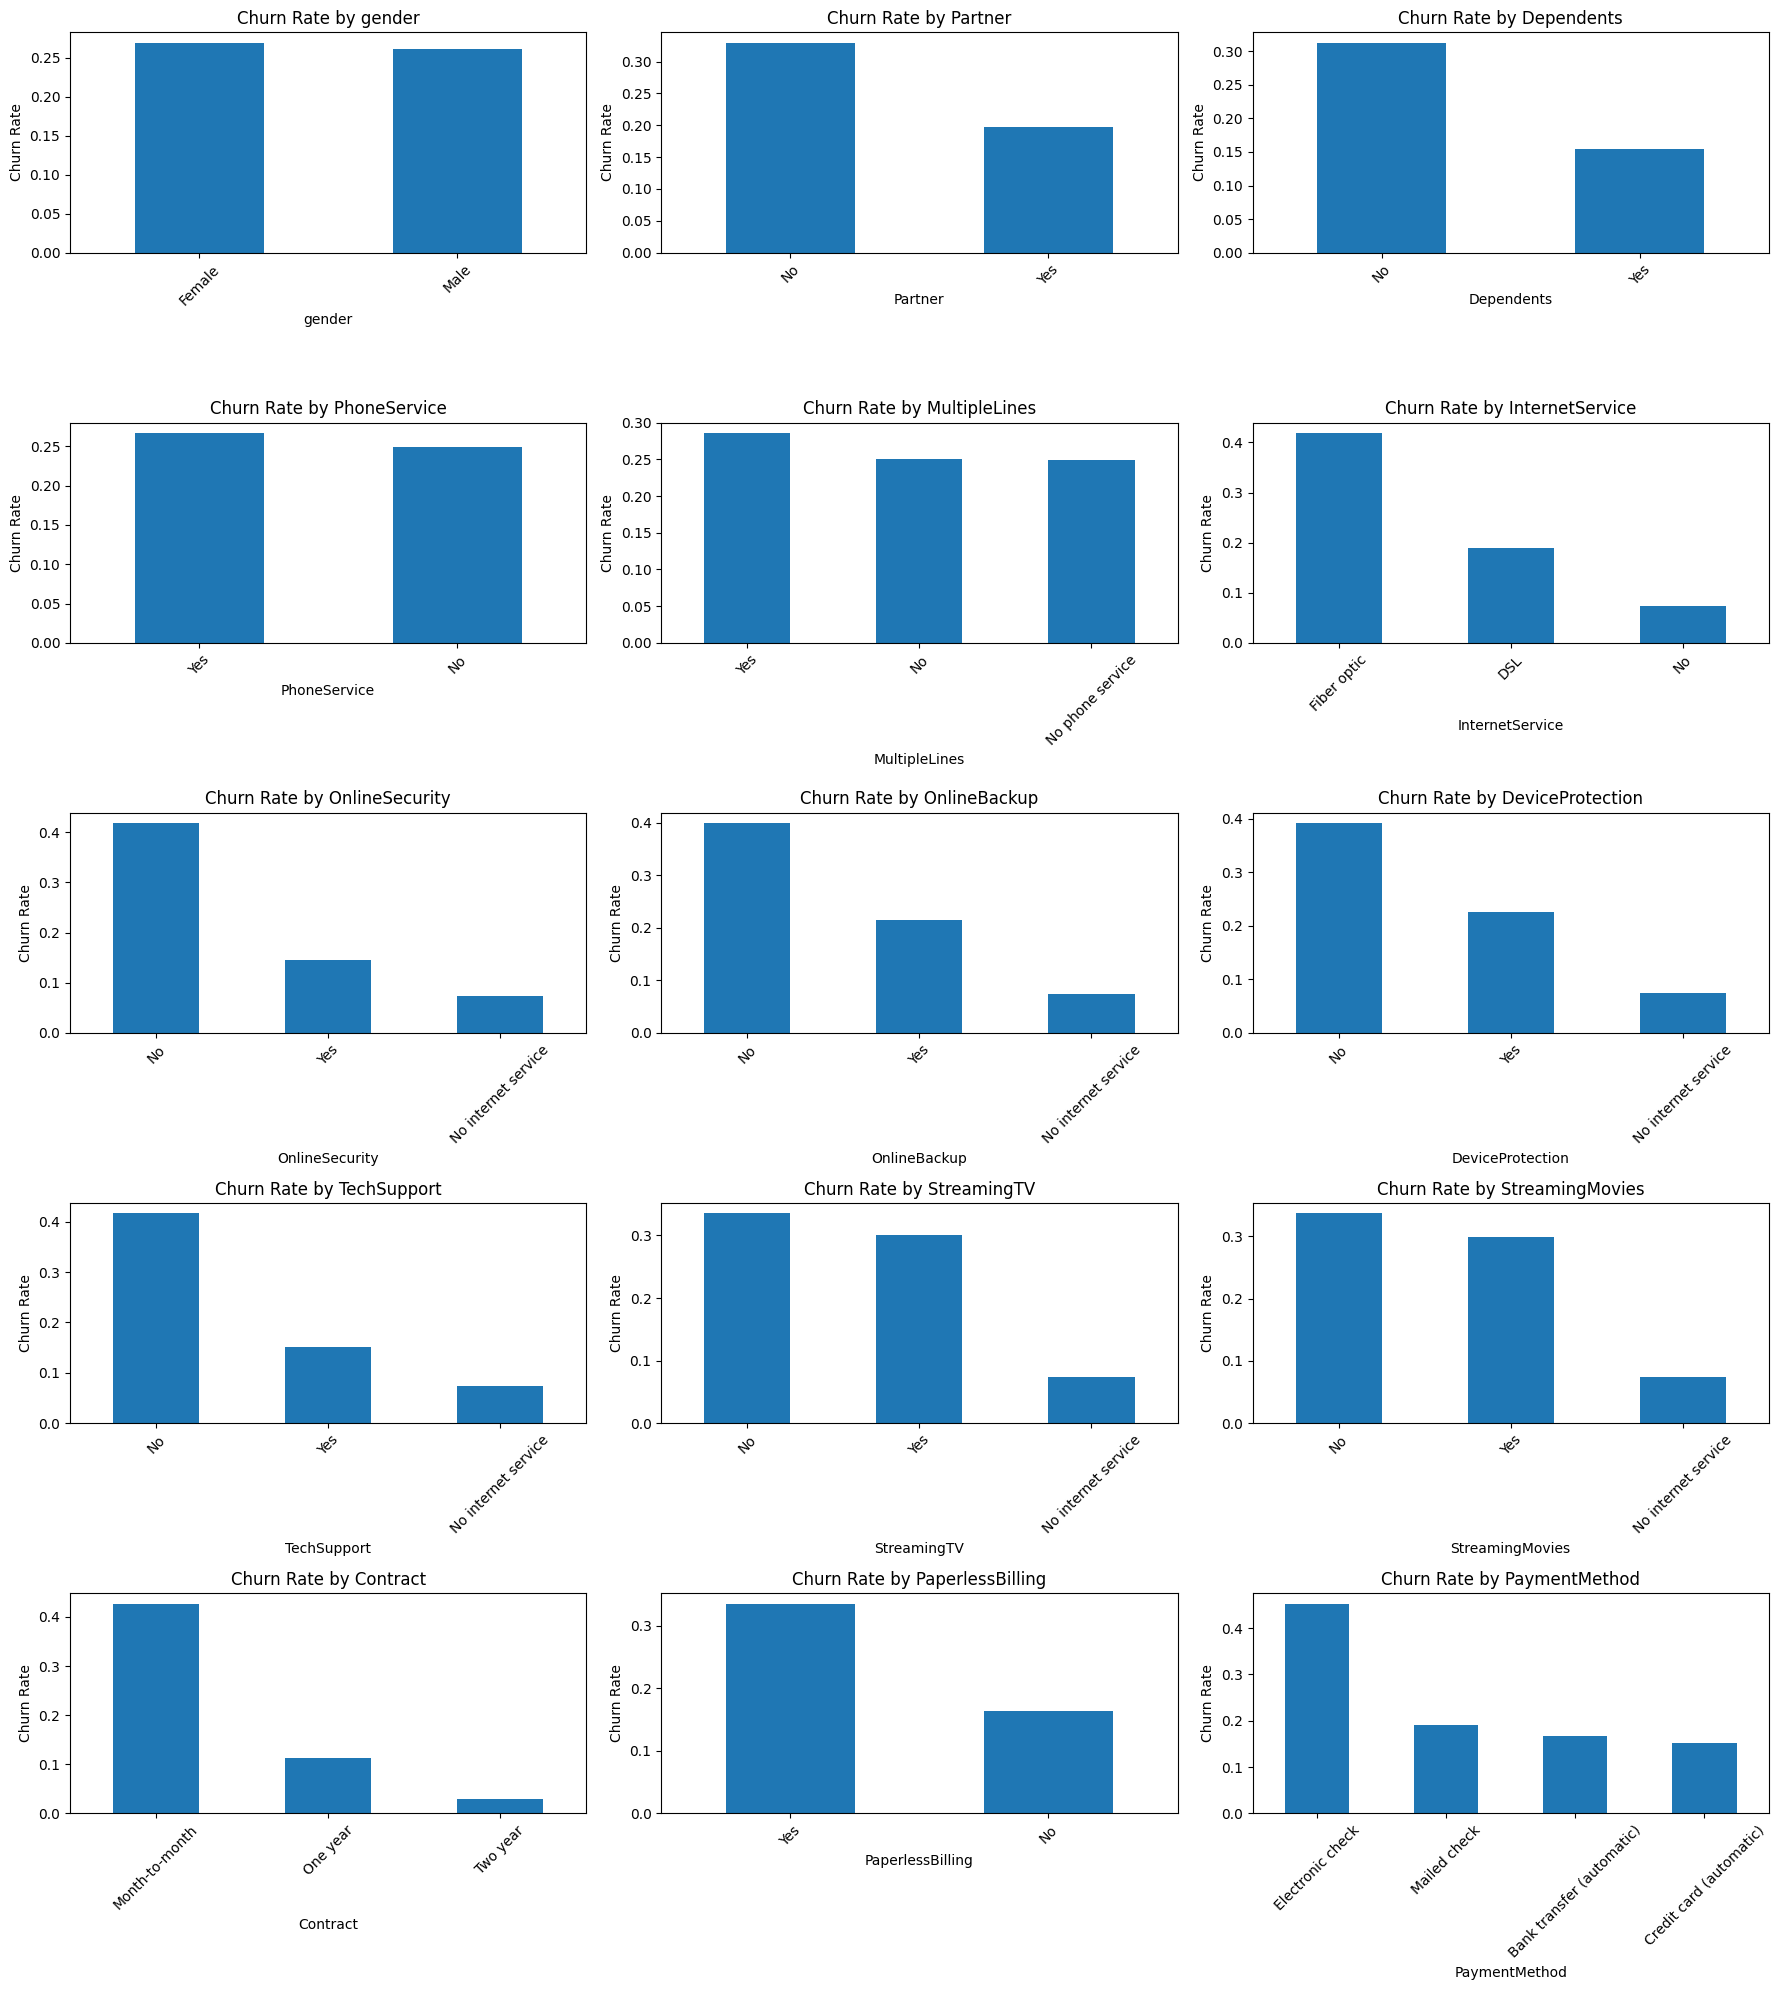

In [11]:
# Target vs Categorical features (Churn rate)
cat_cols = df.select_dtypes(include='object').columns

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 20))
axes = axes.flatten()

for ax, col in zip(axes, cat_cols):
  churn_rate = df.groupby(col)['Churn'].mean().sort_values(ascending=False)
  churn_rate.plot(kind='bar', ax=ax)
  ax.set_title(f'Churn Rate by {col}')
  ax.set_ylabel('Churn Rate')
  ax.set_xlabel(col)
  ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- Gender shows nearly identical churn rates, indicating it has minimal predictive value.
- Customers without partners or dependents churn significantly more, suggesting household stability reduces churn risk.
- PhoneService and MultipleLines show weak churn separation, implying limited standalone predictive power.
- Fiber optic internet users churn at much higher rates than DSL or no-internet customers, making InternetService a strong churn driver.
- Lack of OnlineSecurity, OnlineBackup, DeviceProtection, or TechSupport is consistently associated with very high churn rates.
- Customers with no internet service exhibit the lowest churn, indicating bundled internet services drive churn risk.
- Streaming services (TV and Movies) show moderate churn differences, suggesting secondary influence rather than primary drivers.
- Month-to-month contracts have drastically higher churn than one- or two-year contracts, making Contract the strongest categorical predictor.
- Paperless billing customers churn more, indicating a behavioral or billing-related churn signal.
- Electronic check users churn far more than other payment methods, highlighting PaymentMethod as a high-risk segment.

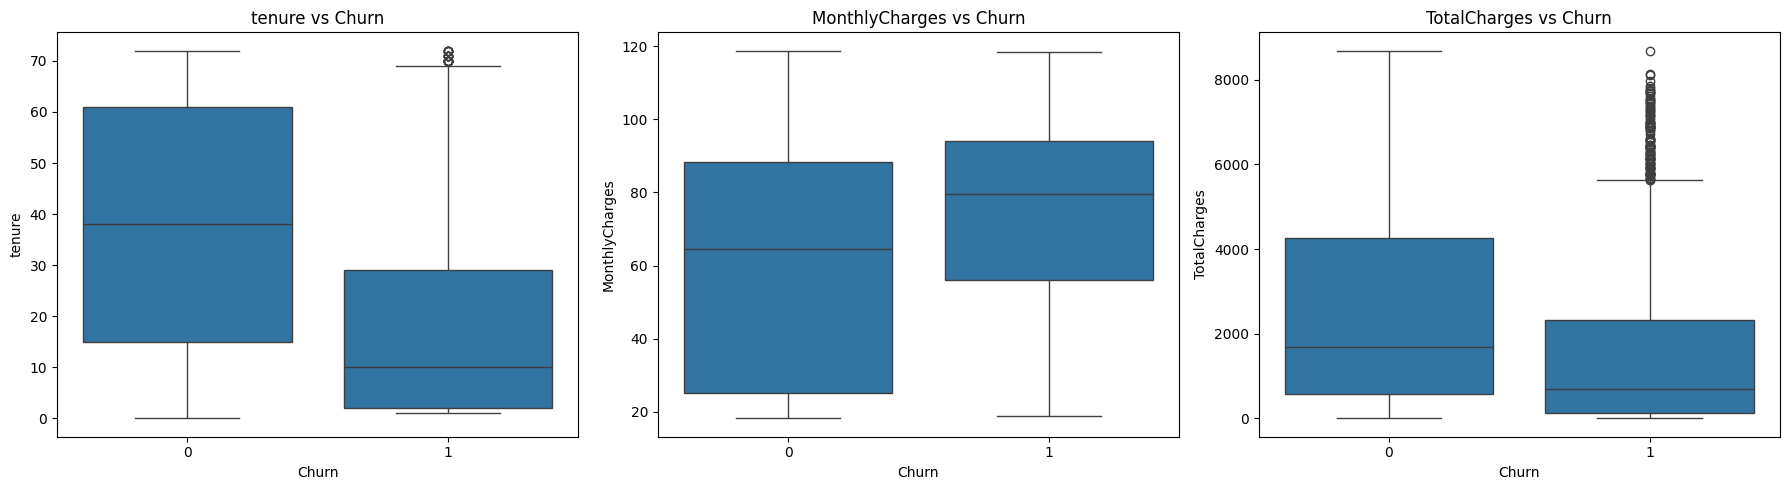

In [12]:
# Target vs Numerical features (Distribution comparison)
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, col in zip(axes, num_cols):
  sns.boxplot(x='Churn', y=col, data=df, ax=ax)
  ax.set_title(f'{col} vs Churn')

plt.tight_layout()
plt.savefig('numeric_features_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

- Churned customers have significantly lower tenure, confirming tenure as a strong inverse predictor of churn.
- Customers who churn tend to have higher monthly charges, indicating pricing pressure contributes to churn risk.
- TotalCharges is substantially lower for churned customers, reflecting shorter customer lifetimes rather than lower spending behavior.
- Heavy overlap in MonthlyCharges distributions suggests churn is not driven by price alone but by interactions with contract and service features.
- The strong tenure–TotalCharges relationship implies redundancy and requires cautious interpretation of feature importance.

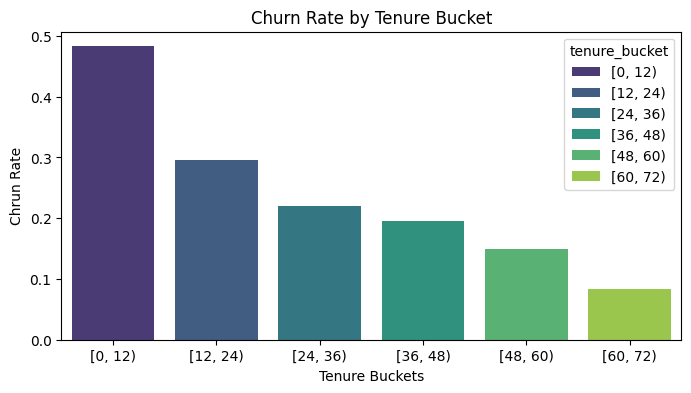

In [13]:
# Tenure bucketing
df_tenure_bucket = df.copy()
df_tenure_bucket['tenure_bucket'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 36, 48, 60, 72],
    right=False
)

plt.figure(figsize=(8,4))
sns.barplot(data=df_tenure_bucket, x='tenure_bucket', y='Churn', hue='tenure_bucket', errorbar=None, palette='viridis')
plt.title('Churn Rate by Tenure Bucket')
plt.ylabel('Chrun Rate')
plt.xlabel('Tenure Buckets')
plt.show()

- Churn rate is highest in the first year of tenure and declines monotonically as customer tenure increases.
- Nearly half of customers churn within the first 12 months, indicating early tenure as the highest-risk period.
- Long-tenure customers (60+ months) exhibit very low churn, reflecting strong customer loyalty.
- The clear downward trend confirms tenure as the single strongest predictor of churn.
- Non-linear churn decay across tenure buckets justifies the use of tree-based models over linear approaches.

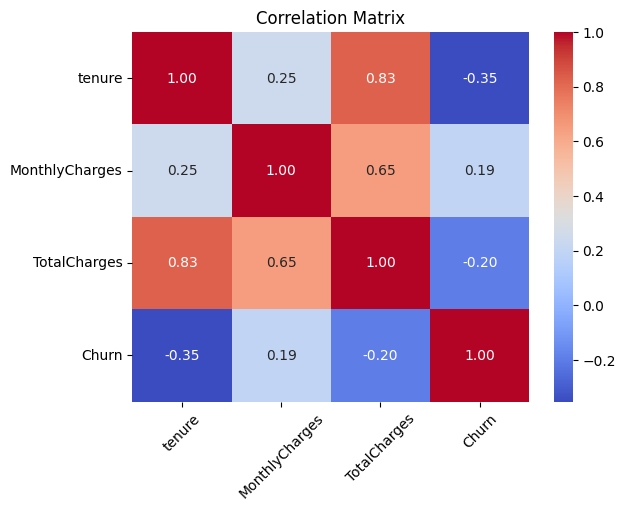

In [14]:
# Correlation and Redundancy
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.savefig('Correlation Matrix.png', dpi=300, bbox_inches='tight')
plt.show()

- TotalCharges is strongly correlated with tenure, confirming redundancy driven by customer lifetime rather than independent spending behavior.
- The weak linear correlations with churn suggest that non-linear interactions, rather than single-feature effects, dominate churn behavior.
- High correlation between tenure and TotalCharges implies feature importance from tree models must be interpreted cautiously.

# **Exploratory Data Analysis (EDA) Summary**

---

The Telco Customer Churn dataset consists of **7,043 customer records and 20 features** after removing the non-informative customer identifier. The dataset is dominated by **categorical variables**, with only a small number of numerical features (`tenure`, `MonthlyCharges`, and `TotalCharges`), making appropriate encoding and non-linear modeling essential

The target variable, **Churn**, is binary and exhibits **moderate class imbalance**, with non-churned customers significantly outnumbering churners. Approximately **one-quarter of customers churn**, indicating that accuracy alone would be a misleading evaluation metric; instead, recall and F1-score for the churn class are more appropriate.

---

## **Key Categorical Insights**

Churn behavior varies substantially across service and contract-related features. **Contract type** emerges as the strongest categorical driver, with ***month-to-month customers exhibiting drastically higher churn*** compared to one- and two-year contracts. Customers using ***fiber optic internet***, ***electronic check payments***, and ***paperless billing*** also show significantly elevated churn rates. In contrast, customers without internet services or those subscribed to long-term contracts display the lowest churn. Features such as ***OnlineSecurity***, ***TechSupport***, ***DeviceProtection***, and ***OnlineBackup*** show consistently lower churn when enabled, highlighting the importance of value-added services in customer retention. Demographic features like gender show negligible churn separation and provide minimal predictive value.

---

## **Key Numerical Insights**

***Tenure demonstrates the strongest relationship with churn***, with churn rates highest among customers in their first year and declining monotonically as tenure increases. Nearly half of customers churn within the first 12 months, identifying early tenure as the most critical risk period. ***Customers who churn tend to have higher `MonthlyCharges`***, suggesting pricing pressure contributes to churn, although substantial overlap indicates that price alone is insufficient to explain churn behavior. ***`TotalCharges` is lower for churned customers***, reflecting shorter customer lifetimes rather than reduced spending propensity.

---

## **Correlation and Redundancy**

***Correlation analysis reveals a strong positive correlation between `tenure` and `TotalCharges`***, confirming redundancy driven by customer lifetime accumulation. Linear correlations between numerical features and churn are relatively weak, reinforcing that churn is driven by non-linear interactions rather than isolated linear effects. As a result, feature importance from tree-based models must be interpreted cautiously, particularly for correlated variables.

---

## **EDA Conclusion**

Overall, the EDA confirms that churn is driven primarily by **customer tenure, contract structure, internet service type, payment behavior, and value-added services**, rather than demographic attributes alone. The presence of non-linear patterns, interaction effects, and feature redundancy strongly justifies the use of tree-based models, such as Random Forests, along with careful handling of class imbalance and feature encoding in subsequent modeling stages.

# **Random Forest Classification Model**

In [15]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 3.9 MB/s eta 0:00:00


In [16]:
# Importing sikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from category_encoders.target_encoder import TargetEncoder
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix

In [17]:
# Spiting DataFrame into X and y (Features and Target)
X = df.drop(columns='Churn')
y = df['Churn']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)

In [18]:
# Identifing categorical columns and number columns
cat_cols = X_train.select_dtypes(include='object').columns
num_cols = X_train.select_dtypes(exclude='object').columns

# Adding Tarrget Encoding to categorical columns only
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', TargetEncoder(smoothing=10), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

In [19]:
# Random Forest with OOB
clf = RandomForestClassifier(n_estimators=200, class_weight='balanced', oob_score=True, random_state=42, n_jobs=-1)

In [20]:
# Pipeline
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', clf)
    ]
)

In [21]:
pipeline.fit(X_train, y_train)

# Evalution
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:,1]

# Scores
oob_score = pipeline.named_steps['model'].oob_score_
print('OOB socre:', oob_score)
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('ROC-AUC:', roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))

OOB socre: 0.7900248491302805
Accuracy Score: 0.7849538679914834
ROC-AUC: 0.8241210054509287
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



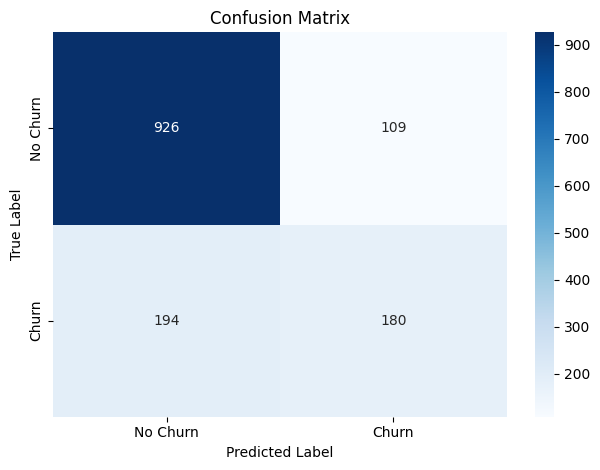

In [22]:
# Computing confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Ploting heatmap
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['No Churn', 'Churn'],
    yticklabels=['No Churn', 'Churn']
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [23]:
thresholds = np.arange(0.2, 0.6, 0.05)

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    print(f"\nThreshold: {t:.2f}")
    print(classification_report(y_test, y_pred_t))


Threshold: 0.20
              precision    recall  f1-score   support

           0       0.92      0.67      0.77      1035
           1       0.48      0.84      0.61       374

    accuracy                           0.71      1409
   macro avg       0.70      0.75      0.69      1409
weighted avg       0.80      0.71      0.73      1409


Threshold: 0.25
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1035
           1       0.49      0.78      0.60       374

    accuracy                           0.73      1409
   macro avg       0.69      0.74      0.70      1409
weighted avg       0.79      0.73      0.74      1409


Threshold: 0.30
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1035
           1       0.53      0.72      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79

- A decision threshold of 0.35 was selected to balance churn recall and precision, increasing churn recall from 0.48 to 0.67 while maintaining stable overall performance.

In [24]:
leaf_sizes = [5, 10, 25, 50]

for leaf in leaf_sizes:
    pipeline.named_steps['model'].set_params(min_samples_leaf=leaf)
    pipeline.fit(X_train, y_train)

    oob = pipeline.named_steps['model'].oob_score_
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    print(f"min_samples_leaf={leaf} | OOB={oob:.3f} | ROC-AUC={roc_auc_score(y_test, y_proba):.3f}")

min_samples_leaf=5 | OOB=0.778 | ROC-AUC=0.840
min_samples_leaf=10 | OOB=0.771 | ROC-AUC=0.844
min_samples_leaf=25 | OOB=0.760 | ROC-AUC=0.845
min_samples_leaf=50 | OOB=0.753 | ROC-AUC=0.844


- Increasing min_samples_leaf reduced model variance without affecting ranking performance, and a value of 25 was selected to maximize ROC-AUC while improving generalization.

In [25]:
depths = [None, 10, 15, 20]

for d in depths:
    pipeline.named_steps['model'].set_params(max_depth=d)
    pipeline.fit(X_train, y_train)

    oob = pipeline.named_steps['model'].oob_score_
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    print(f"max_depth={d} | OOB={oob:.3f} | ROC-AUC={roc_auc_score(y_test, y_proba):.3f}")

max_depth=None | OOB=0.753 | ROC-AUC=0.844
max_depth=10 | OOB=0.753 | ROC-AUC=0.845
max_depth=15 | OOB=0.753 | ROC-AUC=0.844
max_depth=20 | OOB=0.753 | ROC-AUC=0.844


- Random Forest performance was insensitive to max_depth once regularized by min_samples_leaf, and a depth of 15 was selected as a safe upper bound without sacrificing ROC-AUC.


In [26]:
# final model parameters
pipeline.named_steps['model'].set_params(
    min_samples_leaf=25,
    max_depth=15
)

pipeline.fit(X_train, y_train)

# Scores
oob_score = pipeline.named_steps['model'].oob_score_
print('OOB socre:', oob_score)
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('ROC-AUC:', roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))

OOB socre: 0.7598509052183173
Accuracy Score: 0.7849538679914834
ROC-AUC: 0.8444354026195457
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



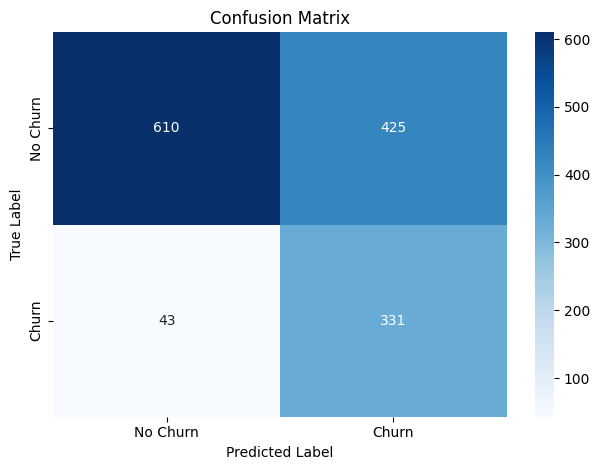

In [27]:
# Apply chosen threshold
best_threshold = 0.35
y_pred_final = (y_proba >= best_threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_final)

# Ploting heatmap
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['No Churn', 'Churn'],
    yticklabels=['No Churn', 'Churn']
)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

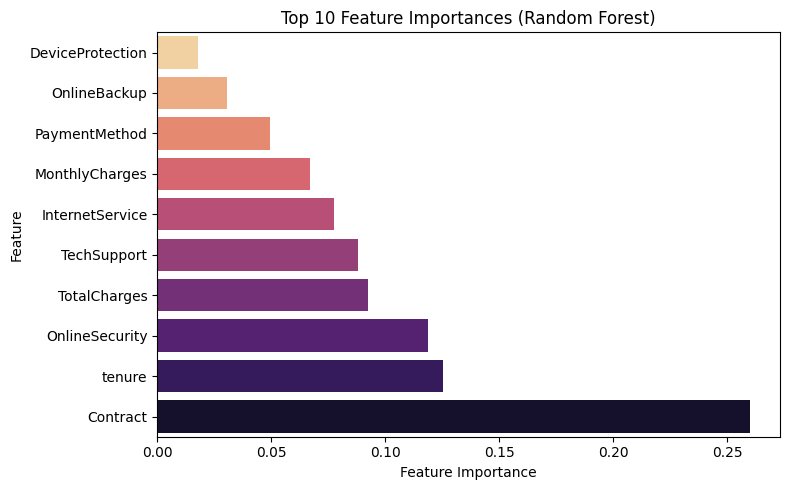

In [28]:
# Extracting trained Random Forest
rf_model = pipeline.named_steps['model']

# Getting feature names after preprocessing
cat_cols = pipeline.named_steps['preprocessor'].transformers_[0][2]
num_cols = pipeline.named_steps['preprocessor'].transformers_[1][2]
feature_names = list(cat_cols) + list(num_cols)

# Createing feature importance DataFrame
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Selecting top 10 features
top_10 = feature_importance.head(10)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=top_10, x='Importance', y='Feature', hue='Feature', palette='magma')
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

# **Final Insights & Project Conclusion**

This project focused on predicting customer churn using the Telco Customer Churn dataset, which contains 7,043 customer records and a mix of categorical and numerical features after removing non-informative identifiers. Given the moderate class imbalance (approximately 26% churners), the problem was framed as a risk identification task rather than a pure accuracy optimization exercise.

---

## **Key Insights from EDA**

Exploratory analysis revealed that **churn is primarily driven by behavioral and contractual factors**, not demographics. Customer tenure emerged as the strongest predictor: churn rates are highest during the first year and decline steadily as tenure increases, with long-tenure customers exhibiting strong loyalty. Contract type showed a similarly strong effect, where month-to-month customers churn at substantially higher rates than those on one- or two-year contracts. Internet service type, particularly fiber optic, along with payment behavior (electronic check) and paperless billing, were also associated with elevated churn. In contrast, demographic attributes such as gender showed negligible predictive value. Correlation analysis further confirmed redundancy between tenure and TotalCharges, reinforcing the need for models capable of handling non-linear interactions.

---

## **Modeling Approach and Performance**

A Random Forest classifier was selected due to its ability to capture complex, non-linear relationships and interactions between features. Categorical variables were handled using target encoding, which preserved ordinal churn risk information without exploding dimensionality. The model was trained using class weighting and evaluated with Out-of-Bag (OOB) scoring to estimate generalization performance without excessive cross-validation.

The final model achieved:
- OOB Score: ~0.76
- ROC-AUC: ~0.84
- Accuracy: ~0.78

Hyperparameter tuning showed that increasing `min_samples_leaf` reduced variance without materially affecting ranking performance, and the model was largely insensitive to `max_depth` once regularized, indicating stable generalization behavior.

---

## **Threshold Optimization and Business Interpretation**

Rather than relying on the default 0.5 decision threshold, multiple thresholds were evaluated to balance false positives and false negatives. A threshold of 0.35 was selected, increasing churn recall from approximately 0.48 to 0.67 while maintaining acceptable precision. This choice reflects a business-driven decision: in churn prevention, missing a true churner (Type II error) is typically more costly than incorrectly flagging a loyal customer. Keeping the threshold external to the model ensures flexibility and allows the decision policy to adapt to changing business costs without retraining the model.

---

## **Final Conclusion**

Overall, the analysis confirms that customer churn in this dataset is driven by early tenure risk, contract flexibility, internet service characteristics, payment behavior, and value-added services, rather than static demographic traits. The presence of strong non-linear patterns and feature interactions justified the use of a Random Forest model with target encoding and careful threshold optimization. The final solution demonstrates not only solid predictive performance but also clear alignment with real-world business decision-making, making it suitable for practical churn risk monitoring and targeted retention strategies.